# WeatherPy

## Dependencies

In [44]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress




# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Create Random Geographic Coordinates and List of Cities

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


# Requirement 1: Create Plots to Show Relationship Between Weather Variables and Latitude

## Make API requests to fill in weather data for each city

In [46]:
# Set the URL Base
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Create Counters
record_count = 1
set_count = 1

In [47]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [48]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                          
    except:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | muisne
Processing Record 5 of Set 1 | polyarnyy
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | lethem
Processing Record 10 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | barstow
Processing Record 14 of Set 1 | buqayq
City not found. Skipping...
Processing Record 15 of Set 1 | maldonado
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | narrabri
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 o

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [50]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,-0.05,68,100,5.87,GL,1670340299
1,hobart,-42.8794,147.3294,9.92,82,75,2.57,AU,1670340051
2,avarua,-21.2078,-159.7750,24.03,94,75,6.69,CK,1670340301
3,muisne,0.6000,-80.0333,23.76,83,100,3.37,EC,1670340302
4,polyarnyy,69.1989,33.4478,-4.78,94,100,5.58,RU,1670340302


In [51]:
# Export the city data frame into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-0.05,68,100,5.87,GL,1670340299
1,hobart,-42.8794,147.3294,9.92,82,75,2.57,AU,1670340051
2,avarua,-21.2078,-159.7750,24.03,94,75,6.69,CK,1670340301
3,muisne,0.6000,-80.0333,23.76,83,100,3.37,EC,1670340302
4,polyarnyy,69.1989,33.4478,-4.78,94,100,5.58,RU,1670340302


## Scatter Plots

### a. Latitude vs. Temperature

In [53]:
# Build the dataframe to store the latitudes and temperatures for each city
lat_temp_df = city_data_df.loc[:, ["Lat", "Max Temp"]]
lat_temp_df

,Lat,Max Temp
City_ID,,
0,77.4840,-0.05
1,-42.8794,9.92
2,-21.2078,24.03
3,0.6000,23.76
4,69.1989,-4.78
...,...,...
547,51.5833,-10.78
548,9.1104,35.40
549,18.2170,28.94


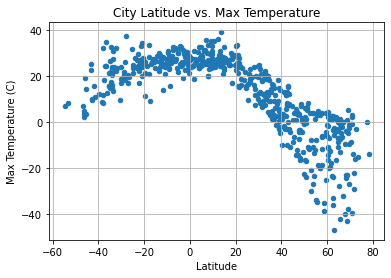

In [54]:
# Build Scatterplot
lat_temp_df.plot.scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()


In [55]:

# Save the figure
plt.savefig("output_data/Fig1.png")

<Figure size 432x288 with 0 Axes>

### b. Latitude vs. Humidity

In [56]:
# Build the dataframe to hold latitude and humidity for each city
lat_humid_df = city_data_df.loc[:,["Lat", "Humidity"]]

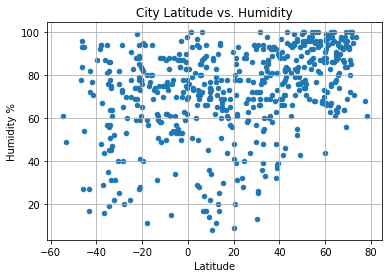

In [57]:
lat_humid_df.plot.scatter("Lat", "Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")
plt.grid()

In [58]:
# Save the figure
plt.savefig("output_data/Fig2.png")

<Figure size 432x288 with 0 Axes>

### c. Latitude vs. Cloudiness

In [59]:
# Build the dataframe to hold latitude and humidity for each city
lat_cloud_df = city_data_df.loc[:,["Lat", "Cloudiness"]]

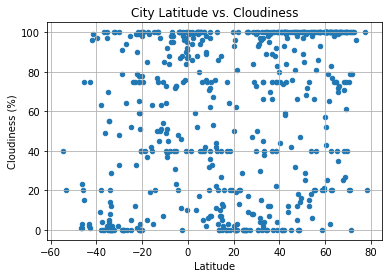

In [60]:
# Build Scatterplot
lat_cloud_df.plot.scatter("Lat", "Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

In [61]:
# Save the figure
plt.savefig("output_data/Fig3.png")

<Figure size 432x288 with 0 Axes>

### d. Latitude vs. Wind Speed 

In [62]:
# Build the dataframe to hold latitude and humidity for each city
lat_wind_df = city_data_df.loc[:,["Lat", "Wind Speed"]]

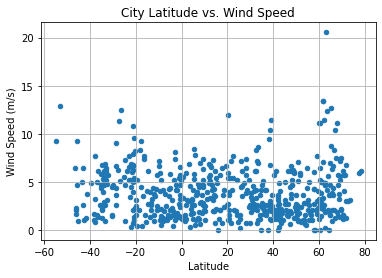

In [63]:
# Build Scatter plot
lat_wind_df.plot.scatter("Lat", "Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

In [64]:
# Save the figure
plt.savefig("output_data/Fig4.png")

<Figure size 432x288 with 0 Axes>

# Requirement 2: Compute Linear Regression for Each Relationship

## Function to create linear regression plots

In [65]:
# Write Function for Linear Regression
def linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = [float(slope)*x_values[i]+intercept for i in range(len(x_values))]
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       #Getting ready to write the equation on the graph

    plt.scatter(x_values,y_values)          #Create scatter plot 
    plt.plot(x_values,regress_values,"b-")      # Plotting red line
    plt.xlabel("Latitude")
    
    print(f"The r value is: {rvalue}")

    return line_eq
    


## Divide DataFrame by Hemisphere

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
N_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

N_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-0.05,68,100,5.87,GL,1670340299
3,muisne,0.6000,-80.0333,23.76,83,100,3.37,EC,1670340302
4,polyarnyy,69.1989,33.4478,-4.78,94,100,5.58,RU,1670340302
5,ponta do sol,32.6667,-17.1000,21.11,86,97,4.18,PT,1670340303
6,dikson,73.5069,80.5464,-15.46,98,96,3.14,RU,1670340304
...,...,...,...,...,...,...,...,...,...
547,drovyanaya,51.5833,113.0333,-10.78,71,68,5.90,RU,1670340598
548,kibala,9.1104,18.3463,35.40,14,32,3.59,TD,1670340599
549,the valley,18.2170,-63.0578,28.94,65,20,3.60,AI,1670340599


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
S_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

S_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hobart,-42.8794,147.3294,9.92,82,75,2.57,AU,1670340051
2,avarua,-21.2078,-159.7750,24.03,94,75,6.69,CK,1670340301
9,vaini,-21.2000,-175.2000,25.09,88,75,2.06,TO,1670340307
11,maldonado,-34.6667,-54.9167,32.66,19,0,1.20,UY,1670340309
12,port alfred,-33.5906,26.8910,22.88,74,12,0.89,ZA,1670340309
...,...,...,...,...,...,...,...,...,...
538,olinda,-8.0089,-34.8553,28.85,61,40,4.12,BR,1670340463
539,esmeraldas,-19.7625,-44.3139,21.17,95,100,1.50,BR,1670340594
540,mopipi,-21.1833,24.8833,33.17,27,59,7.89,BW,1670340595


## Scatterplots

### a. Northern Hemisphere: Temperature vs. Latitude

The r value is: -0.8454579788296713


Text(0, -30, 'y = -0.71x + 34.24')

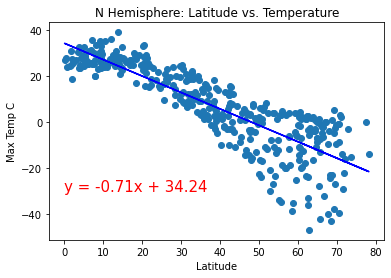

In [68]:
regress_a = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Max Temp"]))
plt.ylabel("Max Temp C")
plt.title("N Hemisphere: Latitude vs. Temperature")
plt.annotate(regress_a,(0,-30),fontsize=15,color="red") # Graphing the equation on the plot 


### b. Southern Hemisphere: Temperature vs. Latitude

The r value is: 0.5940573823508946


Text(-30, 10, 'y = 0.3x + 29.57')

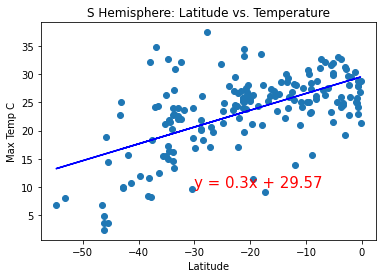

In [69]:
regress_b = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Max Temp"]))
plt.ylabel("Max Temp C")
plt.title("S Hemisphere: Latitude vs. Temperature")
plt.annotate(regress_b,(-30,10),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Temperature and Latitude

There is a negative linear relationship between temperature and latitude for cities in the Northern hemisphere, while the relationship is positive in the Southern hemisphere. This can be explained by the fact that as you approach the Equator, the temperature increases, and as you depart from the equator, the temperature decreases. 

### c. Norther Hemisphere: Humidity vs. Latitude

The r value is: 0.3940285179467069


Text(40, 20, 'y = 0.38x + 60.6')

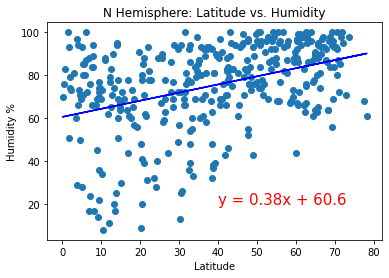

In [70]:
regress_c = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Humidity"]))
plt.ylabel("Humidity %")
plt.title("N Hemisphere: Latitude vs. Humidity")
plt.annotate(regress_c,(40,20),fontsize=15,color="red") # Graphing the equation on the plot 

### d. Southern Hemisphere: Humidity vs. Latitude

The r value is: 0.15656065539119565


Text(-25, 20, 'y = 0.23x + 72.04')

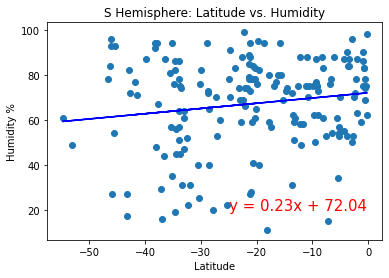

In [71]:
regress_d = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Humidity"]))
plt.ylabel("Humidity %")
plt.title("S Hemisphere: Latitude vs. Humidity")
plt.annotate(regress_d,(-25,20),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Humidity and Latitude

There looks to be a stronger linear relationship between humidity abd latitude in the Northern hemisphere compared to the Southern with correlation coefficients of 0.39 and 0.12, respectively. Both, however, are weakly correlated. 

### e. Northern Hemisphere: Cloudiness vs. Latitude

The r value is: 0.24473407352181245


Text(35, 30, 'y = 0.45x + 45.65')

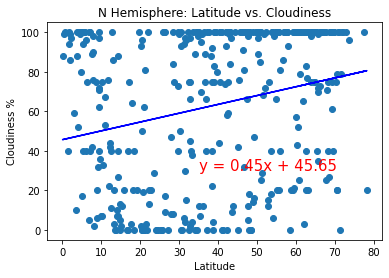

In [72]:
regress_e = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Cloudiness"]))
plt.ylabel("Cloudiness %")
plt.title("N Hemisphere: Latitude vs. Cloudiness")
plt.annotate(regress_e,(35,30),fontsize=15,color="red") # Graphing the equation on the plot 

### f. Southern Hemisphere: Cloudiness vs. Latitude

The r value is: 0.41696844527905275


Text(-55, 55, 'y = 1.16x + 76.2')

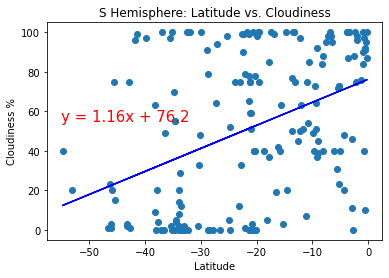

In [73]:
regress_f = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Cloudiness"]))
plt.ylabel("Cloudiness %")
plt.title("S Hemisphere: Latitude vs. Cloudiness")
plt.annotate(regress_f,(-55,55),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Cloudiness and Latitude

There does not appear to be a linear correlation between cloudiness and latitude as both hemispheres have a correlation coefficient under 0.2. Both plots are extremely scattered. 

### g. Northern Hemisphere: Wind Speed vs. Latitude

The r value is: 0.09518639996296924


Text(10, 12.5, 'y = 0.01x + 3.22')

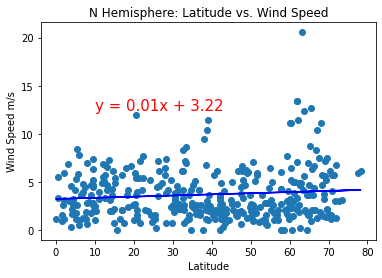

In [74]:
regress_g = linreg(list(N_hemi_df["Lat"]), list(N_hemi_df["Wind Speed"]))
plt.ylabel("Wind Speed m/s")
plt.title("N Hemisphere: Latitude vs. Wind Speed")
plt.annotate(regress_g,(10,12.5),fontsize=15,color="red") # Graphing the equation on the plot 

### h. Southern Hemisphere: Wind Speed vs. Latitude

The r value is: -0.20014675737159443


Text(-50, 10, 'y = -0.04x + 3.28')

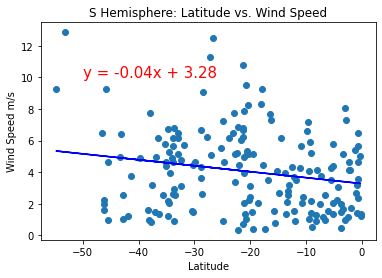

In [75]:
regress_h = linreg(list(S_hemi_df["Lat"]), list(S_hemi_df["Wind Speed"]))
plt.ylabel("Wind Speed m/s")
plt.title("S Hemisphere: Latitude vs. Wind Speed")
plt.annotate(regress_h,(-50,10),fontsize=15,color="red") # Graphing the equation on the plot 

### Discussion about linear relationships between Wind Speed and Latitude

There are weak linear correlations between wind speed and latitude in both hemispheres. There are general trends showing the wind speed to be higher closer to the Earth's poles and weaker towards the Equator. 